Random Forest Model training 

Challenge : Imbalance target column ---> Solution apply Swot and other strategies

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, 
                              roc_auc_score, roc_curve)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

In [6]:
df = pd.read_csv('../Data/data_standardized.csv')

In [8]:
df.head()

,Unnamed: 0,Age,Income,LoanAmount,MonthsEmployed,InterestRate,Risk_Score,Affordability_Index,Employment_Maturity,Default
0,0,0.833990,0.089693,-1.086833,0.590533,0.261771,-0.205494,0.360521,0.789675,0
1,1,1.701221,-0.823021,-0.044309,-1.285731,-1.308350,-0.072441,-0.454419,-0.420416,0
2,2,0.166888,0.043854,0.022715,-0.968209,1.156831,0.127186,-0.386242,-0.301056,1
3,3,-0.767053,-1.303452,-1.168538,-1.718715,-0.967805,2.604539,-0.492552,-6.157480,0
4,4,1.100830,-1.592855,-1.671921,-1.487790,-1.052188,0.222707,-0.380341,-1.054394,0


In [9]:
print("Distribution de Default:")
print(df['Default'].value_counts())
print("\nPourcentages:")
print(df['Default'].value_counts(normalize=True) * 100)

Distribution de Default:
Default
0    225694
1     29653
Name: count, dtype: int64

Pourcentages:
Default
0    88.387175
1    11.612825
Name: proportion, dtype: float64


In [10]:
X = df.drop('Default', axis=1)
y = df['Default']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [12]:
Rf_basic=RandomForestClassifier()

In [13]:
Rf_basic.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [14]:
y_pred = Rf_basic.predict(X_test)

In [15]:
metrics_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [16]:
print("Classification Report:\n", metrics_report)
print("Confusion Matrix:\n", conf_matrix)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     45139
           1       0.51      0.06      0.11      5931

    accuracy                           0.88     51070
   macro avg       0.70      0.53      0.53     51070
weighted avg       0.85      0.88      0.84     51070

Confusion Matrix:
 [[44774   365]
 [ 5554   377]]


In [17]:
Rf_basic_2=RandomForestClassifier(class_weight='balanced')

In [18]:
Rf_basic_2.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [19]:
y_pred = Rf_basic_2.predict(X_test)
metrics_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [20]:
print("Classification Report:\n", metrics_report)
print("Confusion Matrix:\n", conf_matrix)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94     45139
           1       0.55      0.05      0.09      5931

    accuracy                           0.89     51070
   macro avg       0.72      0.52      0.52     51070
weighted avg       0.85      0.89      0.84     51070

Confusion Matrix:
 [[44895   244]
 [ 5629   302]]


First approche : apply swot

In [45]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check the new distribution
print("Original training set distribution:")
print(y_train.value_counts())
print(f"\nOriginal percentages:")
print(y_train.value_counts(normalize=True) * 100)

print("\n" + "="*50)
print("\nAfter SMOTE:")
print(y_resampled.value_counts())
print(f"\nSMOTE percentages:")
print(pd.Series(y_resampled).value_counts(normalize=True) * 100)

print("\n" + "="*50)
print("\nAfter SMOTE:")
print(y_resampled.value_counts())
print(f"\nSMOTE percentages:")
print(pd.Series(y_resampled).value_counts(normalize=True) * 100)

Original training set distribution:
Default
0    180555
1     23722
Name: count, dtype: int64

Original percentages:
Default
0    88.387337
1    11.612663
Name: proportion, dtype: float64


After SMOTE:
Default
0    180555
1    180555
Name: count, dtype: int64

SMOTE percentages:
Default
0    50.0
1    50.0
Name: proportion, dtype: float64


After SMOTE:
Default
0    180555
1    180555
Name: count, dtype: int64

SMOTE percentages:
Default
0    50.0
1    50.0
Name: proportion, dtype: float64


In [46]:
rf_smote = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)

In [47]:
rf_smote.fit(X_resampled, y_resampled)
y_pred_smote = rf_smote.predict(X_test)
metrics_report_smote = classification_report(y_test, y_pred_smote)
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)


In [48]:
print("Classification Report:\n", metrics_report_smote)
print("Confusion Matrix:\n", conf_matrix_smote)

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.83      0.87     45139
           1       0.24      0.40      0.30      5931

    accuracy                           0.78     51070
   macro avg       0.58      0.62      0.58     51070
weighted avg       0.84      0.78      0.80     51070

Confusion Matrix:
 [[37488  7651]
 [ 3536  2395]]


Alternative Approaches

1. SMOTETomek (SMOTE + Tomek Links)

In [49]:
smotetomek = SMOTETomek(random_state=42)
X_train_smotetomek, y_train_smotetomek = smotetomek.fit_resample(X_train, y_train)

print("After SMOTETomek:")
print(pd.Series(y_train_smotetomek).value_counts())

After SMOTETomek:
Default
0    167753
1    167753
Name: count, dtype: int64


In [50]:
rf_smotetomek = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    random_state=42,
    n_jobs=-1
)

rf_smotetomek.fit(X_train_smotetomek, y_train_smotetomek)
y_pred_smotetomek = rf_smotetomek.predict(X_test)

In [51]:
conf_matrix_smotetomek = confusion_matrix(y_test, y_pred_smotetomek)
metrics_report_smotetomek = classification_report(y_test, y_pred_smotetomek)

In [52]:
print("Classification Report:\n", metrics_report_smotetomek)
print("Confusion Matrix:\n", conf_matrix_smotetomek)

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.82      0.86     45139
           1       0.23      0.43      0.30      5931

    accuracy                           0.77     51070
   macro avg       0.57      0.62      0.58     51070
weighted avg       0.84      0.77      0.80     51070

Confusion Matrix:
 [[36887  8252]
 [ 3404  2527]]


2. Random Under-Sampling

In [53]:
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [54]:
print("After Random Under-Sampling:")
print(pd.Series(y_train_rus).value_counts())

After Random Under-Sampling:
Default
0    23722
1    23722
Name: count, dtype: int64


In [55]:
rf_rus = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    random_state=42,
    n_jobs=-1
)

rf_rus.fit(X_train_rus, y_train_rus)
y_pred_rus = rf_rus.predict(X_test)

In [56]:
classification_report_rus = classification_report(y_test, y_pred_rus)
confusion_matrix_rus = confusion_matrix(y_test, y_pred_rus)

In [57]:
print("Classification Report:\n", classification_report_rus)
print("Confusion Matrix:\n", confusion_matrix_rus)

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.67      0.78     45139
           1       0.21      0.67      0.32      5931

    accuracy                           0.67     51070
   macro avg       0.57      0.67      0.55     51070
weighted avg       0.85      0.67      0.73     51070

Confusion Matrix:
 [[30172 14967]
 [ 1956  3975]]


           Model  Accuracy  Precision (Default)  Recall (Default)  F1-Score (Default)
        Basic RF  0.884472             0.521438          0.063564            0.113315
Balanced Weights  0.885118             0.559041          0.051088            0.093620
           SMOTE  0.780948             0.238403          0.403810            0.299806
      SMOTETomek  0.771764             0.234437          0.426066            0.302454
  Under-Sampling  0.668631             0.209851          0.670207            0.319624


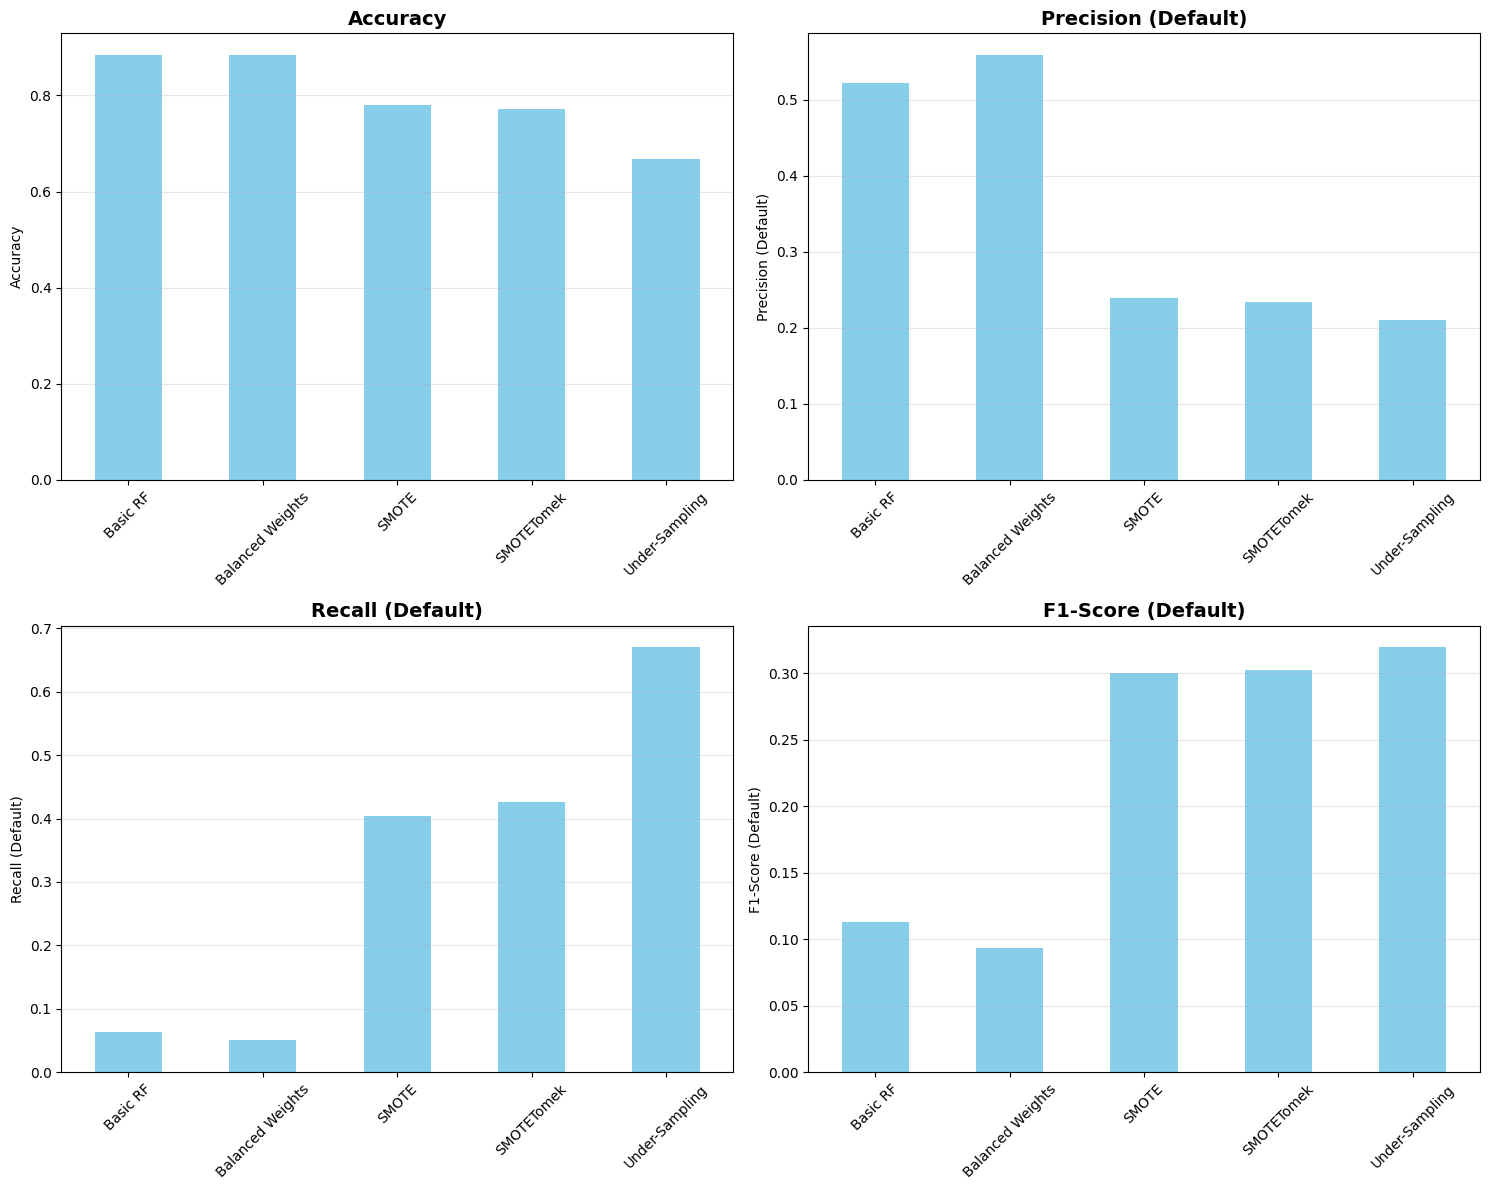

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create comparison DataFrame
models = ['Basic RF', 'Balanced Weights', 'SMOTE', 'SMOTETomek', 'Under-Sampling']
predictions = [
    Rf_basic.predict(X_test),
    Rf_basic_2.predict(X_test),
    rf_smote.predict(X_test),
    rf_smotetomek.predict(X_test),
    rf_rus.predict(X_test)
]

# Compare metrics
results = []
for model_name, y_pred in zip(models, predictions):
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append({
        'Model': model_name,
        'Accuracy': report['accuracy'],
        'Precision (Default)': report['1']['precision'],
        'Recall (Default)': report['1']['recall'],
        'F1-Score (Default)': report['1']['f1-score']
    })

results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

metrics = ['Accuracy', 'Precision (Default)', 'Recall (Default)', 'F1-Score (Default)']
for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    results_df.plot(x='Model', y=metric, kind='bar', ax=ax, legend=False, color='skyblue')
    ax.set_title(metric, fontsize=14, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()